# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FuncFormatter

# Financials

In [2]:
df = pd.read_excel('data/financials.xlsx').set_index('Date')

In [3]:
ordinary_shares_20200930 = 6_437.200203
new_shares_issued = ordinary_shares_20200930 - df.OrdinaryShares[-1]
share_issue_price = 4.68
cash_raised = new_shares_issued*share_issue_price

In [4]:
cash_raised

11715.70435308

After right issue, raised aproximately HK$11.7 billion in cash

In [5]:
COST_OF_EQUITY = 0.10
BVPS = df.NetAssetValue[-1]/df.OrdinaryShares[-1]
BVPS_NEW = (df.NetAssetValue[-1]+cash_raised)/ordinary_shares_20200930

In [6]:
BVPS, BVPS_NEW

(12.551334730262953, 9.49026011721823)

# Model

In [7]:
def justified_PB(roe, r=0.10, g=0.0):
    return (roe-g)/(r-g)

In [8]:
ROE = np.arange(+0.05, +0.12 , 0.001)
g = np.arange(-0.00, +0.05, 0.001)
ROE, g = np.meshgrid(ROE, g)
Z = justified_PB(ROE, g=g)

## Justified P/B Ratio

Text(0.5, 0, 'Justified P/B Ratio')

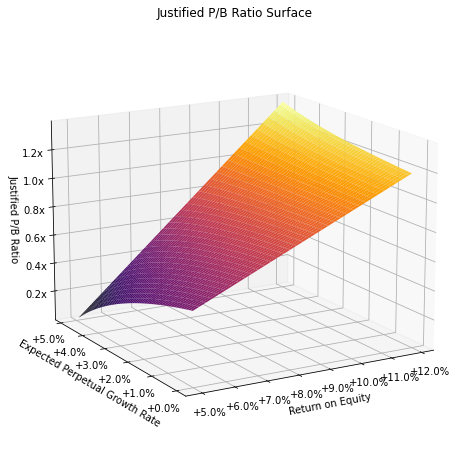

In [9]:
# create plot
fig = plt.figure(figsize=(18,8))
ax = fig.gca(projection='3d')
ax.view_init(elev=15, azim=-120)
surf = ax.plot_surface(ROE, g, Z, cmap=cm.inferno)
# format plot
ax.set_title('Justified P/B Ratio Surface')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,_: f'{x:+.1%}' ))
ax.set_xlabel('Return on Equity')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x,_: f'{x:+.1%}' ))
ax.set_ylabel('Expected Perpetual Growth Rate')
ax.zaxis.set_major_formatter(FuncFormatter(lambda x,_: f'{x:.1f}x' ))
ax.set_zlabel('Justified P/B Ratio')

## Target Price Surface (Before 2020 Right Issue)

Text(0.5, 0, 'Target Price')

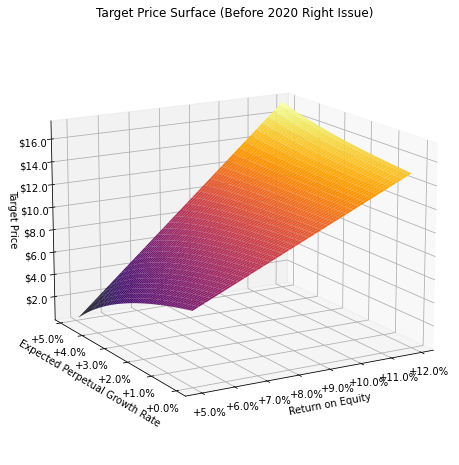

In [10]:
# create plot
fig = plt.figure(figsize=(18,8))
ax = fig.gca(projection='3d')
ax.view_init(elev=15, azim=-120)
surf = ax.plot_surface(ROE, g, Z*BVPS, cmap=cm.inferno)
# format plot
ax.set_title('Target Price Surface (Before 2020 Right Issue)')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,_: f'{x:+.1%}' ))
ax.set_xlabel('Return on Equity')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x,_: f'{x:+.1%}' ))
ax.set_ylabel('Expected Perpetual Growth Rate')
ax.zaxis.set_major_formatter(FuncFormatter(lambda x,_: f'${x:.1f}' ))
ax.set_zlabel('Target Price')

## Target Price Surface (After 2020 Right Issue)

Text(0.5, 0, 'Target Price')

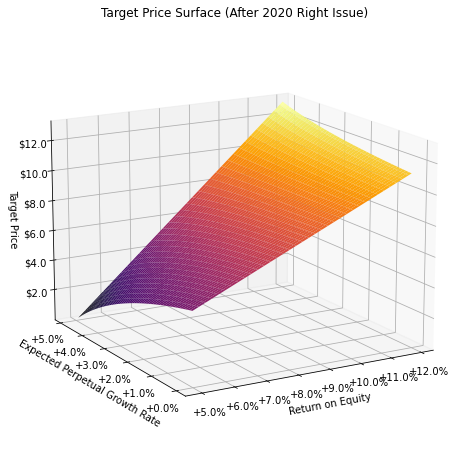

In [11]:
# create plot
fig = plt.figure(figsize=(18,8))
ax = fig.gca(projection='3d')
ax.view_init(elev=15, azim=-120)
surf = ax.plot_surface(ROE, g, Z*BVPS_NEW, cmap=cm.inferno)
# format plot
ax.set_title('Target Price Surface (After 2020 Right Issue)')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,_: f'{x:+.1%}' ))
ax.set_xlabel('Return on Equity')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x,_: f'{x:+.1%}' ))
ax.set_ylabel('Expected Perpetual Growth Rate')
ax.zaxis.set_major_formatter(FuncFormatter(lambda x,_: f'${x:.1f}' ))
ax.set_zlabel('Target Price')